Sidharth Dhawan | 102218069 | BS3

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('store_data.csv', header=None)


transactions = []
for i in range(len(df)):
    transactions.append([str(df.values[i, j]) for j in range(len(df.columns)) if str(df.values[i, j]) != 'nan'])


from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)


frequent_itemsets = apriori(encoded_df, min_support=0.02, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())


Frequent Itemsets:
    support    itemsets
0  0.020397   (almonds)
1  0.033329   (avocado)
2  0.033729  (brownies)
3  0.087188   (burgers)
4  0.030129    (butter)

Association Rules:
      antecedents      consequents  antecedent support  consequent support  \
0       (burgers)           (eggs)            0.087188            0.179709   
1          (eggs)        (burgers)            0.179709            0.087188   
2  (french fries)        (burgers)            0.170911            0.087188   
3       (burgers)   (french fries)            0.087188            0.170911   
4       (burgers)  (mineral water)            0.087188            0.238368   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.028796    0.330275  1.837830               1.0  0.013128    1.224818   
1  0.028796    0.160237  1.837830               1.0  0.013128    1.086988   
2  0.021997    0.128705  1.476173               1.0  0.007096    1.047650   
3  0.021997    0.252294  1.476173       


Formatted Association Rules:
     antecedents    consequents   support  confidence      lift
0        burgers           eggs  0.028796    0.330275  1.837830
1           eggs        burgers  0.028796    0.160237  1.837830
2   french fries        burgers  0.021997    0.128705  1.476173
3        burgers   french fries  0.021997    0.252294  1.476173
4        burgers  mineral water  0.024397    0.279817  1.173883
..           ...            ...       ...         ...       ...
89     spaghetti       pancakes  0.025197    0.144717  1.522468
90     spaghetti         shrimp  0.021197    0.121746  1.703760
91        shrimp      spaghetti  0.021197    0.296642  1.703760
92     spaghetti       tomatoes  0.020931    0.120214  1.757755
93      tomatoes      spaghetti  0.020931    0.306043  1.757755

[94 rows x 5 columns]


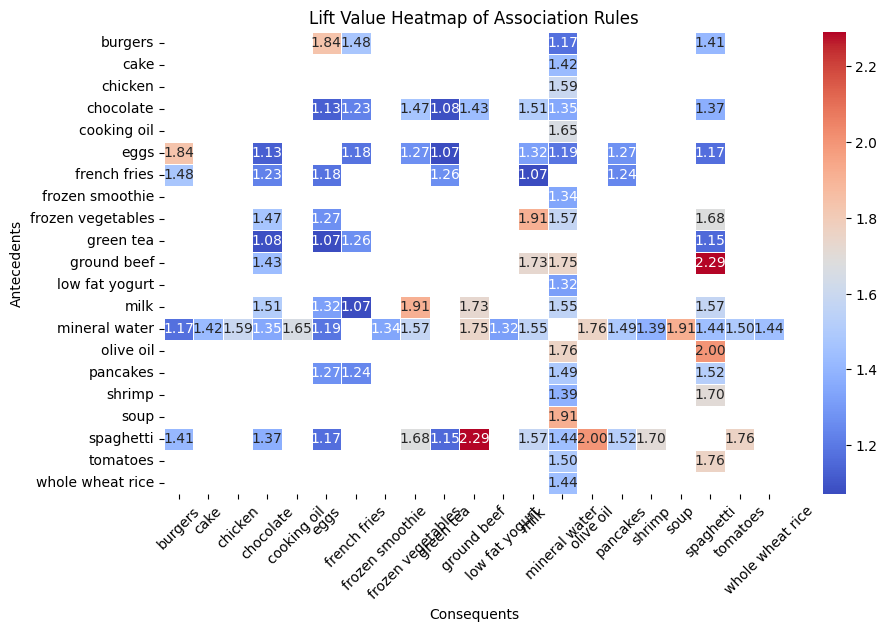

In [ ]:
# Displaying association rules with the help of heatmap 
rules_df = rules[["antecedents", "consequents", "support", "confidence", "lift"]].copy()  

rules_df.loc[:, "antecedents"] = rules_df["antecedents"].apply(lambda x: ', '.join(list(x)))
rules_df.loc[:, "consequents"] = rules_df["consequents"].apply(lambda x: ', '.join(list(x)))

print("\nFormatted Association Rules:")
print(rules_df)

rules_df.to_csv("association_rules.csv", index=False)



pivot_table = rules_df.pivot(index="antecedents", columns="consequents", values="lift")


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Lift Value Heatmap of Association Rules")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()
